In [1]:
import pandas as pd

df_raw  = pd.read_csv("EDA_1.csv")

C:\Users\shyam\AppData\Local\Temp\ipykernel_31748\2876266297.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw  = pd.read_csv("EDA_1.csv")


In [2]:
df_raw.columns

Index(['Unnamed: 0', 'Report Number', 'Local Case Number', 'Agency Name',
       'ACRS Report Type', 'Crash Date/Time', 'Route Type', 'Road Name',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [3]:
df_raw["Driver Substance Abuse"].value_counts()

Driver Substance Abuse
NONE DETECTED              122547
UNKNOWN                     26041
only alcohol                 5522
only alcohol suspect          413
only drug suspect             259
only drug                     122
combined suspect              118
MEDICATION PRESENT            117
MEDICATION CONTRIBUTED         64
COMBINATION CONTRIBUTED        47
Name: count, dtype: int64

In [4]:
crosstab_1 = pd.crosstab(df_raw["Driver Substance Abuse"], df_raw["Driver At Fault"])

<Axes: xlabel='Driver At Fault', ylabel='Driver Substance Abuse'>

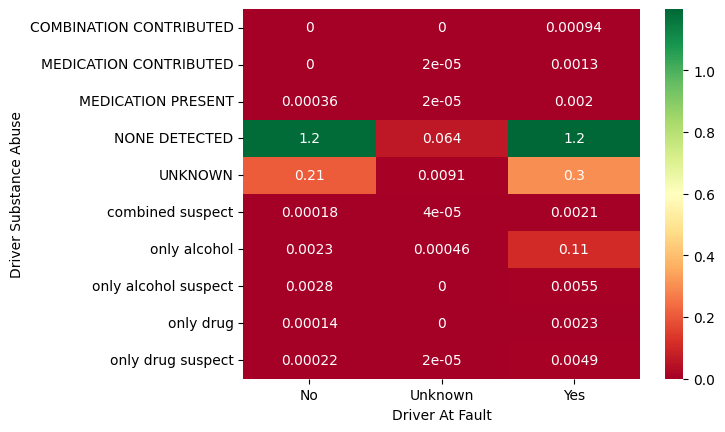

In [5]:
import seaborn as sns
sns.heatmap(crosstab_1/50000, annot=True, cmap = "RdYlGn")

In [6]:
crosstab_1["Y_Percentage"] = crosstab_1["Yes"]/(crosstab_1["Yes"]+crosstab_1["Unknown"]+crosstab_1["No"])

In [7]:
crosstab_1

Driver At Fault,No,Unknown,Yes,Y_Percentage
Driver Substance Abuse,,,,
COMBINATION CONTRIBUTED,0,0,47,1.000000
MEDICATION CONTRIBUTED,0,1,63,0.984375
MEDICATION PRESENT,18,1,98,0.837607
NONE DETECTED,59408,3192,59947,0.489176
UNKNOWN,10455,453,15133,0.581122
combined suspect,9,2,107,0.906780
only alcohol,113,23,5386,0.975371
only alcohol suspect,140,0,273,0.661017
only drug,7,0,115,0.942623


In [8]:
crosstab_2 = pd.crosstab(df_raw["Surface Condition"], df_raw["Driver At Fault"])

In [9]:
crosstab_2

Driver At Fault,No,Unknown,Yes
Surface Condition,,,
dry,62922,3198,65156
ice,454,24,647
"mud, dirt, gravel",15,4,30
oil,13,0,15
other,91,4,95
sand,4,1,3
slush,93,2,135
snow,411,27,588
unknown,6823,758,14391


In [10]:
crosstab_2["Y_Percentage"] = crosstab_2["Yes"]/(crosstab_2["Yes"]+crosstab_2["Unknown"]+crosstab_2["No"])

In [11]:
crosstab_2

Driver At Fault,No,Unknown,Yes,Y_Percentage
Surface Condition,,,,
dry,62922,3198,65156,0.496328
ice,454,24,647,0.575111
"mud, dirt, gravel",15,4,30,0.612245
oil,13,0,15,0.535714
other,91,4,95,0.500000
sand,4,1,3,0.375000
slush,93,2,135,0.586957
snow,411,27,588,0.573099
unknown,6823,758,14391,0.654970


In [12]:
df_raw.fillna("None", inplace=True)
df_raw["Collision Type"] = df_raw["Collision Type"].apply(lambda x: str.lower(x))

In [13]:
crosstab_3 = pd.crosstab(df_raw["Collision Type"], df_raw["Driver At Fault"])

In [14]:
crosstab_3["Y_Percentage"] = crosstab_3["Yes"]/(crosstab_3["Yes"]+crosstab_3["Unknown"]+crosstab_3["No"])

In [15]:
crosstab_3

Driver At Fault,No,Unknown,Yes,Y_Percentage
Collision Type,,,,
angle,1787,0,901,0.335193
angle meets left head on,347,21,332,0.474286
angle meets left turn,975,81,977,0.480571
angle meets right turn,582,38,584,0.485050
front to front,588,0,251,0.299166
front to rear,3104,0,1212,0.280816
head on,1661,98,2027,0.535394
head on left turn,6298,415,6213,0.480659
none,150,35,400,0.683761


if there is single vehicle involved mostly the driver is at fault

In [16]:
df_raw["Weather"].value_counts()

Weather
CLEAR                                116781
RAINING                               20611
CLOUDY                                17295
None                                  13356
Clear                                 11094
Rain                                   1741
SNOW                                   1444
Cloudy                                 1318
UNKNOWN                                 693
FOGGY                                   676
WINTRY MIX                              391
OTHER                                   370
SLEET                                   218
SEVERE WINDS                            154
Snow                                    125
BLOWING SNOW                            115
Unknown                                 100
Blowing Snow                             28
Fog, Smog, Smoke                         19
BLOWING SAND, SOIL, DIRT                 15
Freezing Rain Or Freezing Drizzle        13
Severe Crosswinds                         9
Sleet Or Hail           

In [17]:
import datetime
df_raw["Crash Date/Time"] = df_raw["Crash Date/Time"].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y %H:%M:%S %p"))
type(df_raw["Crash Date/Time"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
df_raw = df_raw.sort_values(by='Crash Date/Time')

In [19]:
df_raw["date_crash_count"] = df_raw["Crash Date/Time"].value_counts

In [20]:
df_raw["date_crash_count"].unique()

array([<bound method IndexOpsMixin.value_counts of 130530   2015-01-01 01:10:00
       44614    2015-01-01 01:10:00
       14306    2015-01-01 01:14:00
       76925    2015-01-01 01:14:00
       144869   2015-01-01 01:19:00
                        ...
       186389   2024-10-16 04:00:00
       186199   2024-10-16 07:58:00
       186338   2024-10-16 07:58:00
       186456   2024-10-16 08:01:00
       186357   2024-10-16 09:26:00
       Name: Crash Date/Time, Length: 186570, dtype: datetime64[ns]>           ],
      dtype=object)

In [21]:
df_raw["Crash Date/Time"].value_counts()

Crash Date/Time
2018-12-10 06:10:00    11
2023-12-11 06:30:00    10
2017-03-03 06:00:00    10
2020-06-09 06:53:00    10
2019-03-28 09:30:00    10
                       ..
2016-09-28 08:58:00     1
2016-09-28 09:00:00     1
2022-05-01 08:38:00     1
2018-01-25 08:20:00     1
2024-10-16 09:26:00     1
Name: count, Length: 101265, dtype: int64

In [22]:
df_raw["Vehicle First Impact Location"].unique()

array(['TWELVE OCLOCK', 'SIX OCLOCK', 'THREE OCLOCK', 'ONE OCLOCK',
       'EIGHT OCLOCK', 'None', 'FIVE OCLOCK', 'UNKNOWN', 'SEVEN OCLOCK',
       'FOUR OCLOCK', 'ELEVEN OCLOCK', 'TEN OCLOCK', 'TWO OCLOCK',
       'NINE OCLOCK', 'UNDERSIDE', 'ROOF TOP', 'NON-COLLISION',
       'Seven O Clock', 'Vehicle Not at Scene', 'One O Clock',
       'Underside', 'Twelve O Clock', 'Eight O Clock', 'Two O Clock',
       'Six O Clock', 'Nine O Clock', 'Eleven O Clock', 'Five O Clock',
       'Non-Collision', 'Top', 'Four O Clock', 'Ten O Clock',
       'Three O Clock', 'Cargo Loss'], dtype=object)

In [23]:
df_raw.columns

Index(['Unnamed: 0', 'Report Number', 'Local Case Number', 'Agency Name',
       'ACRS Report Type', 'Crash Date/Time', 'Route Type', 'Road Name',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Latitude', 'Longitude', 'Location',
       'date_crash_count'],
      dtype='object')

In [24]:


crosstab_4 = pd.crosstab(df_raw["Injury Severity"], df_raw["Driver At Fault"])

In [25]:
crosstab_4["Y_Percentage"] = crosstab_4["yes"]/(crosstab_4["yes"]+crosstab_4["unknown"]+crosstab_4["no"])

KeyError: 'yes'

In [38]:
crosstab_4

Driver At Fault,no,unknown,yes,Y_Percentage
Injury Severity,,,,
fatal injury,34,33,103,0.605882
no apparent injury,65307,3918,83138,0.545657
none,831,0,56,0.063134
possible injury,10905,399,7144,0.387251
suspected minor injury,7195,296,5670,0.430818
suspected serious injury,658,38,845,0.548345


In [10]:
df_raw=df_raw.applymap(lambda x: str(x).lower() if isinstance(x,str) else x)

C:\Users\shyam\AppData\Local\Temp\ipykernel_31316\3360914244.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_raw=df_raw.applymap(lambda x: str(x).lower() if isinstance(x,str) else x)


In [39]:
df_raw["Driver At Fault"].value_counts()

Driver At Fault
yes        96956
no         84930
unknown     4684
Name: count, dtype: int64

In [40]:
df_raw["Agency Name"].value_counts()

Agency Name
montgomery county police     138376
montgomery                    22881
rockville police departme      9839
gaithersburg police depar      7843
takoma park police depart      2993
rockville                      1614
gaithersburg                   1294
maryland-national capital      1155
takoma                          400
mcpark                          175
Name: count, dtype: int64

In [42]:
df_raw["ACRS Report Type"].value_counts()

ACRS Report Type
property damage crash    118969
injury crash              67129
fatal crash                 472
Name: count, dtype: int64

In [43]:


crosstab_5 = pd.crosstab(df_raw["Route Type"], df_raw["Driver At Fault"])

In [44]:
crosstab_5["Y_Percentage"] = crosstab_5["yes"]/(crosstab_5["yes"]+crosstab_5["unknown"]+crosstab_5["no"])

In [45]:
crosstab_5

Driver At Fault,no,unknown,yes,Y_Percentage
Route Type,,,,
bicycle route,114,0,57,0.333333
county,23124,1372,31078,0.559218
county route,3413,0,1720,0.335087
crossover,64,0,19,0.228916
government,217,51,359,0.572568
government route,48,0,11,0.186441
interstate (state),1651,77,1610,0.482325
local route,193,0,87,0.310714
maryland (state),37738,2018,37323,0.484217


In [23]:
crosstab_6 = pd.crosstab(df_raw["Collision Type"], df_raw["Driver At Fault"])

In [24]:
crosstab_6["Y_Percentage"] = crosstab_6["yes"]/(crosstab_6["yes"]+crosstab_6["no"])

In [25]:
crosstab_6.sort_values(by="Y_Percentage", ascending=False)

Driver At Fault,no,unknown,yes,Y_Percentage
Collision Type,,,,
single vehicle,2598,411,14518,0.848212
unknown,153,120,548,0.781740
other,7097,711,12216,0.632527
opposite direction sideswipe,1214,137,1532,0.557902
same direction sideswipe,6874,756,8597,0.555685
opposite dir both left turn,124,45,153,0.552347
head on,1661,98,2027,0.549620
same direction right turn,1763,132,1937,0.523514
same dir rend right turn,339,15,366,0.519149


In [26]:
df_raw.columns

Index(['Unnamed: 0', 'Report Number', 'Local Case Number', 'Agency Name',
       'ACRS Report Type', 'Crash Date/Time', 'Route Type', 'Road Name',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Latitude', 'Longitude', 'Location'],
      dtype='object')